<a href="https://colab.research.google.com/github/clferreira1985/PUC_RJ-Pos_Ciencia_de_Dados_e_Analytics/blob/main/Machine_Learning/MVP_Hotel_Reservations_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Prevendo cancelamentos de hotéis




## 1º Problema de Negócio

Identificar como se encontra a empresa, entender a taxa de cancelamento e prevê a intenção de compra do consumidor com a maquina preditiva que melhor se performar.


### Os dados

###### Eles forneceram a você os dados de suas reservas em um arquivo chamado hotel_bookings.csv, que contém o seguinte:

###### Coluna ---> Descrição
###### Booking_ID ---> Identificador único da reserva.
###### no_of_adults ---> O número de adultos.
###### no_of_children ---> O número de filhos.
###### no_of_weekend_nights ---> Número de noites de fim de semana (sábado ou domingo).
###### no_of_week_nights ---> Número de noites da semana (segunda a sexta).
###### type_of_meal_plan ---> Tipo de plano de refeições incluído na reserva.
###### required_car_parking_space ---> Se é necessário um espaço de estacionamento.
###### room_type_reserved ---> O tipo de quarto reservado.
###### lead_time ---> Número de dias antes da data de chegada em que a reserva foi feita.
###### arrival_year ---> Ano de chegada.
###### arrival_month ---> Mês de chegada.
###### arrival_date ---> Data do mês de chegada.
###### market_segment_type ---> Como foi feita a reserva.
###### repeated_guest ---> Se o hóspede já se hospedou anteriormente no hotel.
###### no_of_previous_cancellations ---> Número de cancelamentos anteriores.
###### no_of_previous_bookings_not_canceled ---> Número de reservas anteriores que não foram canceladas.
###### avg_price_per_room ---> Preço médio por dia da reserva.
###### no_of_special_requests ---> Contagem de pedidos especiais feitos como parte da reserva.
###### booking_status ---> Se a reserva foi cancelada ou não.

## 2º Análise Exploratória

In [117]:
#Import das bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')



In [118]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/clferreira1985/Projetos_Python/main/Hotel_Reservations_Dataset/Hotel%20Reservations.csv')


In [119]:
# Shape
df.shape

(36275, 19)

In [120]:
#Amostra
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [121]:
df.rename(columns=({'Booking_ID':'reserva',
                    'no_of_adults':'qnt_de_adultos',
                    'no_of_children':'qnt_de_crianças',
                    'no_of_weekend_nights':'qnd_dias_final_de_semana',
                    'no_of_week_nights':'qnd_dias_úteis',
                    'type_of_meal_plan':'tipo_de_refeição',
                    'required_car_parking_space':'vaga_de_estacionamento',
                    'room_type_reserved':'tipo_de_reserva',
                    'lead_time':'tempo_de_reserva',
                    'arrival_year':'ano',
                    'arrival_month':'mês',
                    'arrival_date':'dia',
                    'market_segment_type':'canal_de_compra',
                    'repeated_guest':'qnt_de_hospedagem',
                    'no_of_previous_cancellations':'qnt_de_cancelamentos_anteriores',
                    'no_of_previous_bookings_not_canceled': 'qnt_de_reservas_anteriores_não_canceladas',
                    'avg_price_per_room':'media_dos_precos',
                    'no_of_special_requests':'qnt_de_pedidos_especiais',
                    'booking_status':'status_da_reserva',
                    'have_child':'tem filhos'}),inplace = True)

In [122]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   reserva                                    36275 non-null  object 
 1   qnt_de_adultos                             36275 non-null  int64  
 2   qnt_de_crianças                            36275 non-null  int64  
 3   qnd_dias_final_de_semana                   36275 non-null  int64  
 4   qnd_dias_úteis                             36275 non-null  int64  
 5   tipo_de_refeição                           36275 non-null  object 
 6   vaga_de_estacionamento                     36275 non-null  int64  
 7   tipo_de_reserva                            36275 non-null  object 
 8   tempo_de_reserva                           36275 non-null  int64  
 9   ano                                        36275 non-null  int64  
 10  mês                   

In [123]:
# Temos valores nulos?
df.isna().sum()

reserva                                      0
qnt_de_adultos                               0
qnt_de_crianças                              0
qnd_dias_final_de_semana                     0
qnd_dias_úteis                               0
tipo_de_refeição                             0
vaga_de_estacionamento                       0
tipo_de_reserva                              0
tempo_de_reserva                             0
ano                                          0
mês                                          0
dia                                          0
canal_de_compra                              0
qnt_de_hospedagem                            0
qnt_de_cancelamentos_anteriores              0
qnt_de_reservas_anteriores_não_canceladas    0
media_dos_precos                             0
qnt_de_pedidos_especiais                     0
status_da_reserva                            0
dtype: int64

In [132]:
#quantidade de categorias por coluna
df.select_dtypes(include='object').drop(columns = 'reserva').nunique()

tipo_de_refeição     4
tipo_de_reserva      7
canal_de_compra      5
status_da_reserva    2
dtype: int64

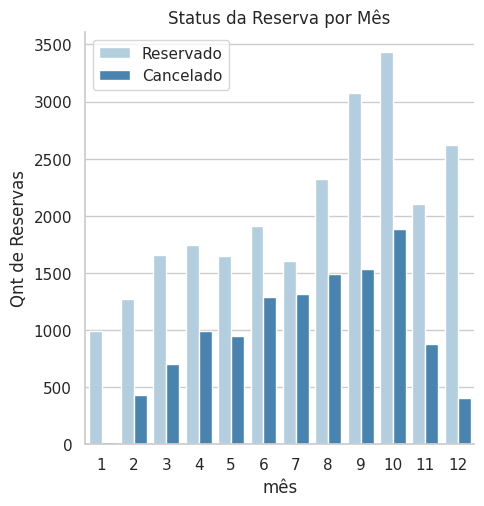

In [125]:
#plot

sns.catplot(data=df, x='mês', kind='count', palette = "Blues", hue='status_da_reserva', legend_out=False)
plt.ylabel('Qnt de Reservas')
plt.xlabel('mês')
plt.title('Status da Reserva por Mês')
plt.legend(['Reservado', 'Cancelado'])
plt.show()

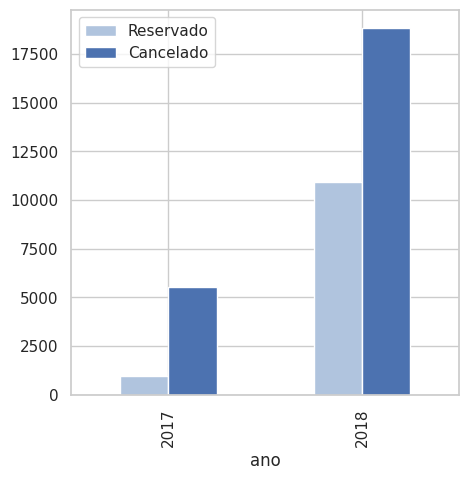

In [126]:
pd.crosstab(df["ano"], df['status_da_reserva']).plot(kind='bar',
                                                      stacked = False,
                                                      figsize = (5, 5),
                                                      color = ['lightsteelblue','b']).legend(['Reservado', 'Cancelado'])


### **Resumo**

Verifiquei que temos uma aumento significativo das vendas de um ano para outro, sendo que a quantidade de cancelamento não aumentou proporcional. Os maiores volumes de cancelamento ocorrem junho e outubro, isso é um problema para empresa.





## 3º Pré-processamento dos dados


#### Encode Classes

 - Transformando o Target e variáveis categóricas em variável numérica para melhorar a performance do algoritmo


In [ ]:
def meal_plan (row):
    if row.type_of_meal_plan == 'Not Selected':
        return 0
    elif row.type_of_meal_plan == 'Meal Plan 1':
        return 1
    elif row.type_of_meal_plan == 'Meal Plan 2':
        return 2
    else:
        return 3

df['type_of_meal_plan'] = df.apply(meal_plan, axis=1)
df.head()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])
df['market_segment_type'].value_counts()




In [ ]:
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])
df['booking_status'].value_counts()



In [ ]:
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['room_type_reserved'].value_counts()

In [ ]:
df.head()

#### Separando os dados entre Treino e Teste de forma interativa

In [ ]:
X = df.drop(labels = ['booking_status','Booking_ID'], axis=1)
y = df.iloc[:,18]

In [ ]:
# Rebalanceamento dos dados
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
sns.countplot(x=y, data=df)

In [ ]:
# Divisão em Dados de Treino e Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [ ]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

In [ ]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

### Decision Tree


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

### Random Forest


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)



### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

### Naives Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

### SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)
f1_svc = f1_score(y_test, y_pred)

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest',
              'Knn',
              'Decision Tree',
              'Logistic Regression',
              'SVC',
              'XGB',
              'Naives Bayes'
                ],
    'F1_Score': [f1_rf,
                 f1_knn,
                 f1_dt,
                 f1_lr,
                 f1_svc,
                 f1_xgb,
                 f1_nb
              ],
      'Accuracy':[accuracy_rf,
                 accuracy_knn,
                 accuracy_dt,
                 accuracy_lr,
                 accuracy_svc,
                 accuracy_xgb,
                 accuracy_nb]})
models.sort_values(by='Accuracy', ascending=False)